We shall be skipping alot of steps here and concentrating mainly on transforming our model from lines of code on a local machine to a web app that users can dynamically interact with. Predictions can be generated in two common ways (i) predict by batch; and (ii) predict in real-time, we will deploy a basic machine learning model built using Pycaret package to predict in real-time. Pycaret is a package that reduces the requirement for coding and allows us more time to understand the data and the business problem.

# Install Flask
If you haven't already done so, start by installing Flask, the framework that allows you to build web applications.

In [6]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


# GitHub
We shall be using GitHub, a cloud-based service to host, manage and control our code. This is particularly useful when you are working in a large team in seperate locations as it is mostly the case in real life practice.
# Heroku
Heroku is a platform as a service (PaaS) that takes your model from a local machine to the web so that anyone can access it using the URL. It has integrated data services and a powerful ecosystem that enables the deployment of web apps based on a managed container system.

# Business Problem
Assuming that an insurance company wants to improve its cash flow forecasting by better predicting patient charges using demographic and basic patient health risk metrics.
Objective
To build a web application where demographic and health information of a patient is entered in a web form to predict insurance premium.

# Tasks
Train and validate models and develop a machine learning pipeline for deployment.
Build a basic HTML front-end with an input form for independent variables (age, sex, bmi, children, smoker, region).
Build a back-end of the web application using a Flask Framework.
Deploy the web app on Heroku. Once deployed, it will become publicly available and can be accessed via Web URL.

# Task 1

In [8]:
import pandas as pd

In [14]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Initialize model
Pycaret has inbuilt capabilities for some preprocessing and data preparation. So we won't be worrying much about that for the purpose of this exercise.

In [15]:
from pycaret.regression import *

In [18]:
regressor = setup(data = df, target = 'charges',
                 session_id = 111,
                 normalize = True,
                 polynomial_features = True,
                 feature_interaction = True,
                 bin_numeric_features = ['age', 'bmi'],
                 numeric_features = ['children'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,111
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
# Model train and validation
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2853.1531,2.099535e+07,4582.0687,0.8359,0.5169,0.2927
1,3683.9898,4.107869e+07,6409.2661,0.6437,0.4498,0.2761
2,2753.9315,1.857497e+07,4309.8689,0.8738,0.3677,0.3006
3,3213.0070,2.835993e+07,5325.4046,0.8023,0.5042,0.3291
4,3627.4617,4.127409e+07,6424.4911,0.7552,0.5130,0.3140
5,2823.3301,2.123074e+07,4607.6832,0.8733,0.4466,0.2894
6,2471.2968,1.628295e+07,4035.2140,0.8928,0.3533,0.3047
7,2760.0969,1.811604e+07,4256.2942,0.8497,0.3995,0.3258
8,2817.4974,2.140738e+07,4626.8108,0.8159,0.4089,0.3155
9,2967.1328,2.199405e+07,4689.7817,0.8556,0.4385,0.3342


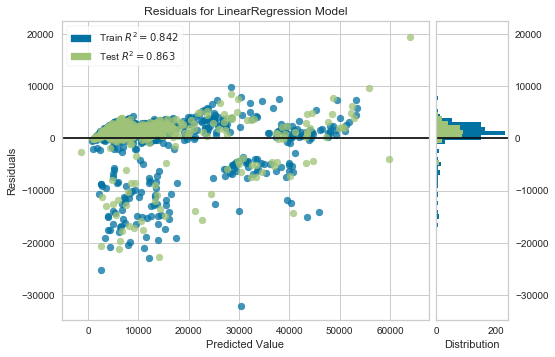

In [20]:
# Visualize heteroskedasticity of the model
plot_model(lr, plot = 'residuals')

# Save Model
save it as a file on the local machine that can be transferred to and consumed by other applications

In [21]:
save_model(lr, model_name = 'C:/Users/admin/Desktop/PERSONAL PROJECTS/insurance_deploy')

Transformation Pipeline and Model Succesfully Saved


# Task 2 —
Building Web Application
There are two parts of this application:
Front-end (designed using HTML)
Back-end (developed using Flask in Python)
# Front-end of Web Application
Generally, the front-end of web applications are built using HTML or php but let's use a simple HTML template and a CSS style sheet to design an input form.
There are numerous free HTML and CSS templates that can be used to build beautiful HTML pages quickly by simple drag and drop.